In [9]:
!pip install tensorflow opencv-python matplotlib

In [10]:
!pip list

Package                           Version
--------------------------------- -------------------
absl-py                           2.3.1
aext-assistant                    4.20.0
aext-assistant-server             4.20.0
aext-core                         4.20.0
aext-core-server                  4.20.0
aext_environments_server          4.20.0
aext-panels                       4.20.0
aext-panels-server                4.20.0
aext-project-filebrowser-server   4.20.0
aext-share-notebook               4.20.0
aext-share-notebook-server        4.20.0
aext-shared                       4.20.0
aext-toolbox                      4.20.0
aiobotocore                       2.19.0
aiohappyeyeballs                  2.4.4
aiohttp                           3.11.10
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.16
alembic                           1.16.5
altair                            5.5.0
anaconda-anon-usage               0.7.1
anacond

In [11]:
import os

In [13]:
import cv2
import imghdr

ModuleNotFoundError: No module named 'cv2'

In [14]:
data_dir = 'data'

In [15]:
os.listdir(os.path.join(data_dir, 'Happy people'))

['images-3.jpeg',
 'Unknown-1.jpeg',
 'images-10.jpeg',
 'images-11.jpeg',
 'images.jpeg',
 'images-2.jpeg',
 'images-5.jpeg',
 'Unknown-7.jpeg',
 'images-9.jpeg',
 'images-8.jpeg',
 'Unknown-6.jpeg',
 'images-4.jpeg',
 'Unknown-5.jpeg',
 'images-7.jpeg',
 'images-6.jpeg',
 'Unknown-4.jpeg',
 'images-12.jpeg',
 'Unknown-3.jpeg',
 'images-1.jpeg',
 'Unknown-2.jpeg',
 'Unknown.jpeg']

In [16]:
image_exts = ['jpeg','jpg','bmp','png']

In [17]:
image_exts[2]

'bmp'

In [18]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Issue with image data/Sad people/images-3.jpeg
Issue with image data/Sad people/Unknown-1.jpeg
Issue with image data/Sad people/images.jpeg
Issue with image data/Sad people/images-2.jpeg
Issue with image data/Sad people/Unknown-11.jpeg
Issue with image data/Sad people/images-5.jpeg
Issue with image data/Sad people/Unknown-7.jpeg
Issue with image data/Sad people/Unknown-16.jpeg
Issue with image data/Sad people/Unknown-6.jpeg
Issue with image data/Sad people/images-4.jpeg
Issue with image data/Sad people/Unknown-5.jpeg
Issue with image data/Sad people/Unknown-9.jpeg
Issue with image data/Sad people/Unknown-14.jpeg
Issue with image data/Sad people/Unknown-15.jpeg
Issue with image data/Sad people/Unknown-8.jpeg
Issue with image data/Sad people/Unknown-4.jpeg
Issue with image data/Sad people/Unknown-12.jpeg
Issue with image data/Sad people/Unknown-3.jpeg
Issue with image data/Sad people/images-1.jpeg
Issue with image data/Sad people/Unknown-2.jpeg
Issue with image data/Sad people/Unknown-13

In [19]:
!conda install matplotlib -y

Jupyter detected...
2 channel Terms of Service accepted
Channels:
 - defaults
Platform: osx-arm64
Solving environment: done


==> WARNING: A newer version of conda exists. <==
    current version: 25.5.1
    latest version: 25.11.0

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [20]:
import sys
sys.executable

'/usr/local/bin/python3.13'

In [21]:
import sys
!{sys.executable} -m pip install matplotlib


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: pip3.13 install --upgrade pip


In [22]:
from matplotlib import pyplot as plt

In [23]:
import numpy as np

In [24]:
import sys
!{sys.executable} -m pip install tensorflow


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: pip3.13 install --upgrade pip


In [25]:
import tensorflow as tf

In [26]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 42 files belonging to 2 classes.


In [27]:
data_iterator = data.as_numpy_iterator()

In [28]:
batch = data_iterator.next()

In [29]:
batch[0].shape

(32, 256, 256, 3)

In [30]:
batch[1]

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1], dtype=int32)

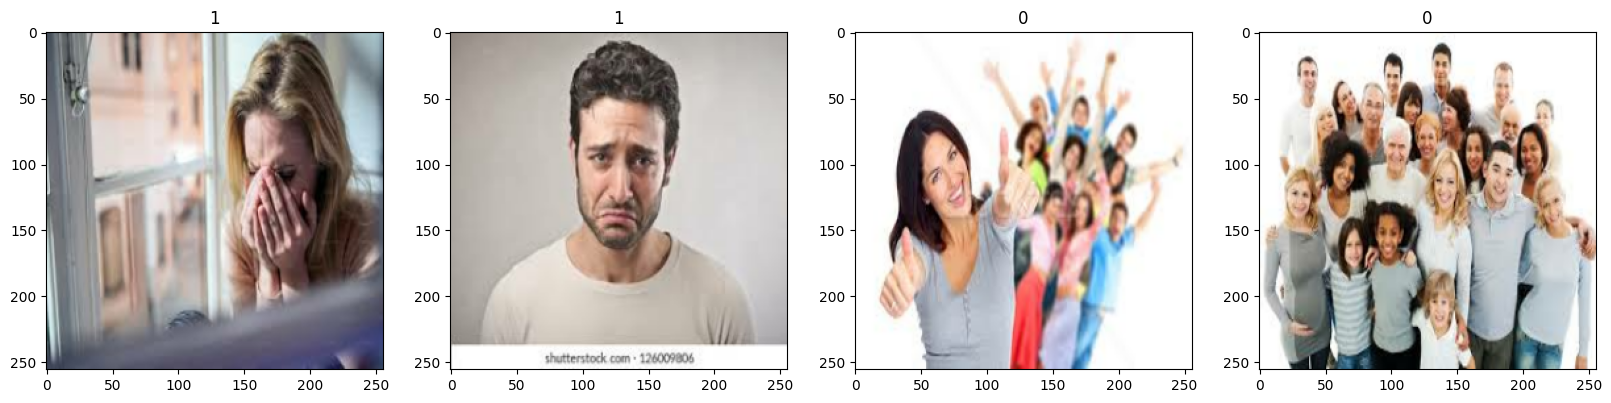

In [104]:
fig, ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [32]:
scaled = batch[0] / 255

In [33]:
scaled.max()

np.float32(1.0)

In [34]:
data = data.map(lambda x,y: (x/255, y))

In [35]:
data.as_numpy_iterator().next()[0].max()

np.float32(1.0)

In [36]:
len(data)

2

In [37]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [38]:
train_size+val_size+test_size

1

In [39]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [40]:
len(train)

1

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Flatten

In [42]:
model = Sequential()

In [43]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [44]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [45]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │    14,745,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,755,825 (56.29 MB)

 Trainable params: 14,755,825 (56.29 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
logdir='logs'

In [49]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [64]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step - accuracy: 1.0000 - loss: 1.1370e-05
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step - accuracy: 1.0000 - loss: 1.1297e-05
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step - accuracy: 1.0000 - loss: 8.2954e-06
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step - accuracy: 1.0000 - loss: 1.1060e-05
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step - accuracy: 1.0000 - loss: 9.7092e-06
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step - accuracy: 1.0000 - loss: 1.0364e-05
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step - accuracy: 1.0000 - loss: 9.1988e-06
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step - accuracy: 1.0000 - loss: 1.0183e-05
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 1.0000 - loss: 1.0223e-05
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - accuracy: 1.0000 - loss: 9.2047e-06
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - accuracy: 1.0000 - loss: 1.0343e-05
Epoch 12/20
1/1 ━━━━━━━━━━━━━━

2025-12-10 21:06:00.888908: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step - accuracy: 1.0000 - loss: 1.0214e-05
Epoch 15/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step - accuracy: 1.0000 - loss: 9.4655e-06
Epoch 16/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step - accuracy: 1.0000 - loss: 9.0488e-06
Epoch 17/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step - accuracy: 1.0000 - loss: 9.5478e-06
Epoch 18/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step - accuracy: 1.0000 - loss: 8.3706e-06
Epoch 19/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step - accuracy: 1.0000 - loss: 7.7447e-06
Epoch 20/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step - accuracy: 1.0000 - loss: 8.2150e-06


In [65]:
hist.history

{'accuracy': [1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'loss': [1.1369801541150082e-05,
  1.1297433957224712e-05,
  8.295442057715263e-06,
  1.1059675671276636e-05,
  9.709152436698787e-06,
  1.036421690514544e-05,
  9.198793122777715e-06,
  1.0182698133576196e-05,
  1.0222723176411819e-05,
  9.204711204802152e-06,
  1.0342657333239913e-05,
  9.11495772015769e-06,
  9.938832590705715e-06,
  1.0214293070021085e-05,
  9.465534276387189e-06,
  9.048775609699078e-06,
  9.547786248731427e-06,
  8.370607247343287e-06,
  7.744749382254668e-06,
  8.214973604481202e-06]}

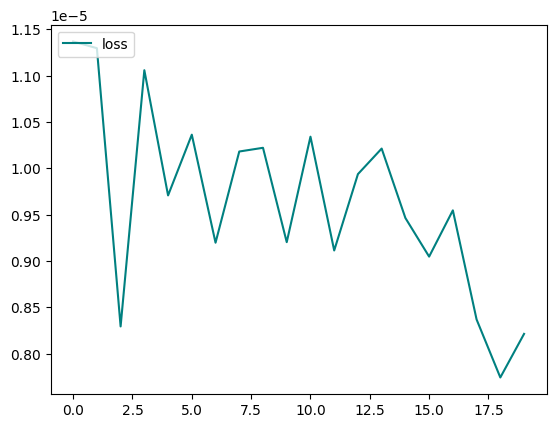

In [72]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.legend(loc="upper left")
plt.show()

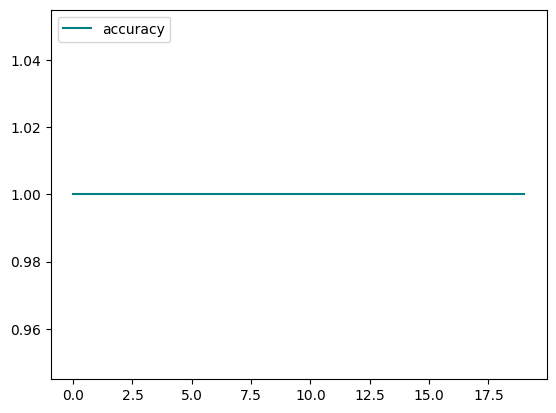

In [73]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.legend(loc="upper left")
plt.show()

In [74]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [76]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [79]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [82]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result()}, Accuracy:{acc.result().numpy}')

Precision:0.0, Recall:0.0, Accuracy:<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=float32, numpy=0.0>>


In [84]:
import sys
!{sys.executable} -m pip install opencv-python

  Using cached opencv_python-4.12.0.88-cp37-abi3-macosx_13_0_arm64.whl.metadata (19 kB)
Using cached opencv_python-4.12.0.88-cp37-abi3-macosx_13_0_arm64.whl (37.9 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 12.6 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.5
    Uninstalling numpy-2.3.5:
      Successfully uninstalled numpy-2.3.5

[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: pip3.13 install --upgrade pip


In [85]:
import cv2

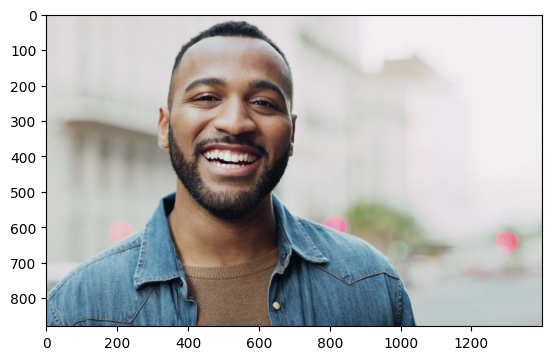

In [136]:
img = cv2.imread('happytest.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

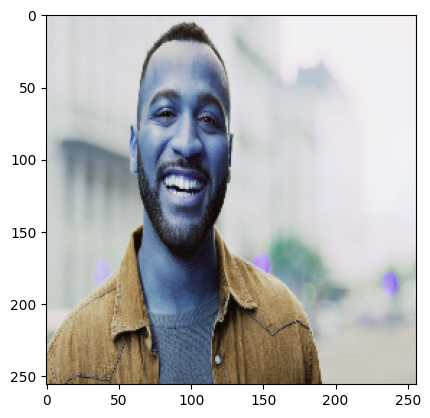

In [137]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [138]:
resize

<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[216.      , 215.      , 217.      ],
        [215.29688 , 214.29688 , 216.29688 ],
        [215.      , 214.      , 216.      ],
        ...,
        [241.      , 238.      , 240.      ],
        [241.      , 238.      , 240.      ],
        [241.      , 238.      , 240.      ]],

       [[216.      , 215.      , 217.      ],
        [215.29688 , 214.29688 , 216.29688 ],
        [215.      , 214.      , 216.      ],
        ...,
        [241.      , 238.      , 240.      ],
        [241.      , 238.      , 240.      ],
        [241.      , 238.      , 240.      ]],

       [[216.      , 215.      , 217.      ],
        [216.      , 215.      , 217.      ],
        [216.      , 215.      , 217.      ],
        ...,
        [241.      , 238.      , 240.      ],
        [241.      , 238.      , 240.      ],
        [241.      , 238.      , 240.      ]],

       ...,

       [[172.23486 , 148.46924 , 102.46924 ],
        [174.

In [139]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [140]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step


In [141]:
yhat

array([[0.0011087]], dtype=float32)

In [142]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


In [125]:
from tensorflow.keras.models import load_model

In [127]:
model.save(os.path.join('models', 'happysadmodel.h5'))

In [129]:
os.path.join('models', 'happysadmodel.h5')

'models/happysadmodel.h5'

In [132]:
new_model = load_model(os.path.join('models', 'happysadmodel.h5'))

In [134]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


In [1]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

NameError: name 'yhat' is not defined

In [ ]:
# FINISHED: THIS LAB DEMOSTRATES A COMPLETE & SUCCESSFUL DETECTION OF A HAPPY OR A SAD PERSON!